In [3]:
# HW3 Assignment 2 
# Gabriel Yin - ty1045 - N10088627

In [1]:
!curl https://data.cityofnewyork.us/api/views/hg8x-zxpr/rows.csv?accessType=DOWNLOAD > housing.csv

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  730k    0  730k    0     0  1176k      0 --:--:-- --:--:-- --:--:-- 1178k


In [6]:
# ove the downloaded data to PUI data
import os
print("PUIdata", os.getenv("PUIDATA"))

PUIdata /nfshome/ty1045/PUIdata


In [7]:
#create the env variable if missing
os.environ["PUIDATA"] = "%s/PUIdata"%os.getenv("HOME")

print("PUIdata", os.getenv("PUIDATA"))

PUIdata /nfshome/ty1045/PUIdata


In [8]:
# move the data
!mv housing.csv $PUIDATA

In [9]:
#test if the data is there
!ls $PUIDATA

housing.csv


## Read in the data with pandas

In [12]:
#read in the data with pandas
import pandas as pd
data = pd.read_csv("%s/housing.csv"%os.getenv("PUIDATA"))

In [14]:
#print the fist 8 lines out
data.head(7)

,Project ID,Project Name,Project Start Date,Project Completion Date,Building ID,Number,Street,Borough,Postcode,BBL,...,2-BR Units,3-BR Units,4-BR Units,5-BR Units,6-BR+ Units,Unknown-BR Units,Counted Rental Units,Counted Homeownership Units,All Counted Units,Total Units
0,51867,THE ROBESON,06/29/2018,NaN,927152.0,407,LENOX AVENUE,Manhattan,10037.0,1.019150e+09,...,32,6,0,0,0,0,79,0,79,79
1,52986,ESSIE JEFFRIES APARTMENTS HDFC.HUDMF.FY18,06/29/2018,NaN,5738.0,1990,AMSTERDAM AVENUE,Manhattan,10032.0,1.021170e+09,...,15,5,5,0,0,0,25,0,25,25
2,52986,ESSIE JEFFRIES APARTMENTS HDFC.HUDMF.FY18,06/29/2018,NaN,42862.0,531,WEST 160 STREET,Manhattan,10032.0,1.021190e+09,...,20,0,0,0,0,0,20,0,20,20
3,52986,ESSIE JEFFRIES APARTMENTS HDFC.HUDMF.FY18,06/29/2018,NaN,42869.0,547,WEST 160 STREET,Manhattan,10032.0,1.021190e+09,...,20,0,0,0,0,0,20,0,20,20
4,54377,CONFIDENTIAL,06/29/2018,NaN,NaN,----,----,Brooklyn,NaN,NaN,...,14,12,0,0,0,0,50,0,50,50
5,59107,LA CABANA HOUSES,06/29/2018,NaN,328793.0,391,LORIMER STREET,Brooklyn,11206.0,3.030310e+09,...,15,35,0,0,0,0,71,0,71,71
6,59107,LA CABANA HOUSES,06/29/2018,NaN,328801.0,417,LORIMER STREET,Brooklyn,11206.0,3.030220e+09,...,9,23,0,0,0,0,48,0,48,48


In [15]:
# for general information
data.describe()

,Project ID,Building ID,Postcode,BBL,BIN,Council District,Census Tract,Latitude,Longitude,Latitude (Internal),...,2-BR Units,3-BR Units,4-BR Units,5-BR Units,6-BR+ Units,Unknown-BR Units,Counted Rental Units,Counted Homeownership Units,All Counted Units,Total Units
count,3287.000000,2490.000000,2400.0000,2.451000e+03,2.194000e+03,3287.000000,2400.000000,2400.000000,2400.000000,2427.000000,...,3287.000000,3287.000000,3287.000000,3287.000000,3287.000000,3287.000000,3287.000000,3287.000000,3287.000000,3287.000000
mean,57758.419227,505091.604819,10760.5000,2.416053e+09,2.490715e+06,27.045939,5845.700000,40.739040,-73.922678,40.736194,...,11.746577,4.065409,0.433222,0.019471,0.005476,0.911774,27.874962,5.520840,33.395802,42.263158
std,5895.966779,383067.099045,528.1386,9.531605e+08,1.038974e+06,14.581211,18741.498619,0.076049,0.052826,0.076246,...,25.355896,10.730457,2.489607,0.249622,0.104525,15.722607,56.864254,32.577266,63.164650,89.563932
min,44225.000000,375.000000,10001.0000,0.000000e+00,1.004133e+06,1.000000,1.000000,40.573144,-74.171232,40.573710,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,52758.000000,100260.250000,10451.0000,2.023865e+09,2.000344e+06,14.000000,177.000000,40.675621,-73.951391,40.673905,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2.000000
50%,58513.000000,378230.500000,11205.0000,3.010280e+09,3.013442e+06,31.000000,291.000000,40.714647,-73.927648,40.708950,...,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,0.000000,8.000000,8.000000
75%,63344.000000,946595.750000,11221.0000,3.035870e+09,3.324414e+06,41.000000,916.000000,40.816433,-73.898450,40.815810,...,12.000000,3.000000,0.000000,0.000000,0.000000,0.000000,28.000000,1.000000,35.000000,43.000000
max,67427.000000,985864.000000,11693.0000,5.031570e+09,5.170228e+06,51.000000,114201.000000,40.904171,-73.730624,40.903970,...,305.000000,193.000000,52.000000,6.000000,4.000000,536.000000,917.000000,489.000000,917.000000,1175.000000


In [17]:
# and get information
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3287 entries, 0 to 3286
Data columns (total 41 columns):
Project ID                            3287 non-null int64
Project Name                          3287 non-null object
Project Start Date                    3287 non-null object
Project Completion Date               1981 non-null object
Building ID                           2490 non-null float64
Number                                3287 non-null object
Street                                3287 non-null object
Borough                               3287 non-null object
Postcode                              2400 non-null float64
BBL                                   2451 non-null float64
BIN                                   2194 non-null float64
Community Board                       3287 non-null object
Council District                      3287 non-null int64
Census Tract                          2400 non-null float64
NTA - Neighborhood Tabulation Area    2400 non-null object
Latit

In [48]:
# make a copy of the data and only get the two wanted columns 
# print reduced dataframe
data_copy = data.copy(deep=True)
data_src = data_copy[['Low Income Units', 'Total Units']]
print(data_src)

      Low Income Units  Total Units
0                   24           79
1                    1           25
2                    3           20
3                    2           20
4                   22           50
5                    4           71
6                    3           48
7                    2           48
8                  193          387
9                  244          446
10                  21          222
11                  16          226
12                  12          226
13                  13          226
14                   1           12
15                   3           10
16                   2           10
17                   1           10
18                  13           20
19                  12           20
20                  98          133
21                   0          119
22                   0          119
23                   0          119
24                   2           20
25                   1           20
26                   0      

In [49]:
data_src.head(10)

,Low Income Units,Total Units
0,24,79
1,1,25
2,3,20
3,2,20
4,22,50
5,4,71
6,3,48
7,2,48
8,193,387
9,244,446


In [50]:
data_src.describe()

,Low Income Units,Total Units
count,3287.000000,3287.000000
mean,14.909948,42.263158
std,37.895873,89.563932
min,0.000000,1.000000
25%,0.000000,2.000000
50%,2.000000,8.000000
75%,12.000000,43.000000
max,536.000000,1175.000000


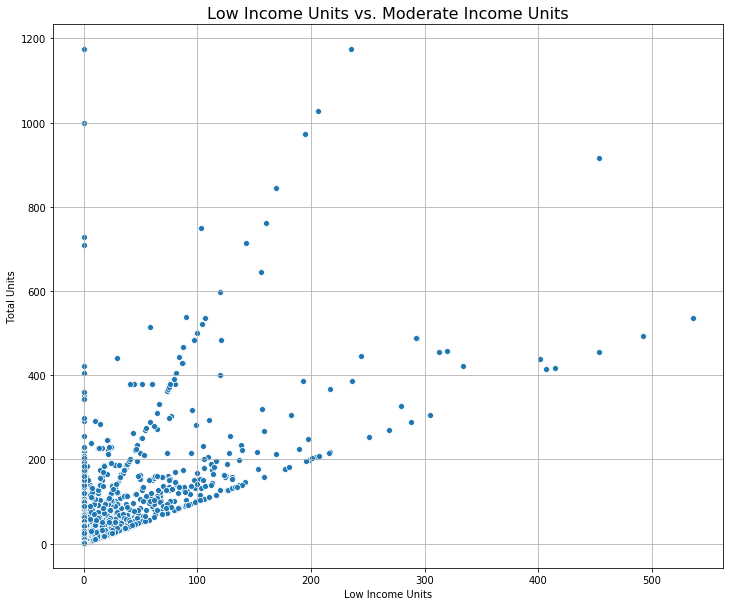

In [51]:
# plot the data 
import matplotlib.pyplot as plt 
import seaborn as sns 

plt.figure(figsize=(12,10))
plt.grid(b=True)
plt.title("Low Income Units vs. Moderate Income Units", fontsize=16)
ax = sns.scatterplot(x="Low Income Units", y="Total Units", data=data_src)

## Extra Credit: Read in the data with APIO and Json

In [56]:
url = "https://data.cityofnewyork.us/resource/q3m4-ttp3.json"

In [57]:
df = pd.read_json(url)

In [58]:
df.head(7)

,_1_br_units,_2_br_units,_3_br_units,_4_br_units,_5_br_units,_6_br_units,all_counted_units,bbl,bin,borough,...,project_completion_date,project_id,project_name,project_start_date,reporting_construction_type,street_name,studio_units,total_units,unknown_br_units,very_low_income_units
0,0,9,0,0,0,0,9,1.003930e+09,1004876.0,Manhattan,...,2017-06-29T00:00:00.000,63845,LESPMHA HDFC,2017-06-29T00:00:00.000,Preservation,AVENUE B,0,9,0,5
1,1,2,0,0,0,0,3,3.034350e+09,3079751.0,Brooklyn,...,2017-10-04T00:00:00.000,65132,1238 DECATUR STREET,2014-12-17T00:00:00.000,New Construction,DECATUR STREET,0,15,0,0
2,3,3,0,0,0,0,6,3.018240e+09,3051695.0,Brooklyn,...,NaN,58589,Madison EDJ LLC,2016-06-29T00:00:00.000,Preservation,PUTNAM AVENUE,0,6,0,0
3,86,188,59,52,0,0,385,3.036280e+09,3326600.0,Brooklyn,...,2016-06-22T00:00:00.000,60470,Omni - Plaza,2016-06-22T00:00:00.000,Preservation,NEW LOTS AVENUE,0,385,0,14
4,0,0,1,0,0,0,1,3.044520e+09,NaN,Brooklyn,...,NaN,53017,Nehemiah Spring Creek Homes at Gateway Estates 4A,2016-06-27T00:00:00.000,New Construction,SCHROEDERS AVENUE,0,1,0,0
5,0,0,0,0,0,0,1,NaN,NaN,Staten Island,...,2017-12-18T00:00:00.000,66457,CONFIDENTIAL,2017-12-18T00:00:00.000,New Construction,----,1,1,0,0
6,1,0,0,0,0,0,1,NaN,NaN,Queens,...,2017-12-18T00:00:00.000,66459,CONFIDENTIAL,2017-12-18T00:00:00.000,New Construction,----,0,1,0,0


In [59]:
df.describe()

,_1_br_units,_2_br_units,_3_br_units,_4_br_units,_5_br_units,_6_br_units,all_counted_units,bbl,bin,building_id,...,low_income_units,middle_income_units,moderate_income_units,other_income_units,postcode,project_id,studio_units,total_units,unknown_br_units,very_low_income_units
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,3.400000e+02,3.030000e+02,347.000000,...,1000.000000,1000.000000,1000.000000,1000.00000,329.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,5.580000,5.699000,1.975000,0.289000,0.015000,0.012000,16.499000,2.446021e+09,2.503013e+06,530879.158501,...,7.415000,1.722000,1.598000,0.08100,10781.474164,58622.976000,2.550000,20.457000,0.379000,3.154000
std,19.781226,18.635334,6.565781,2.522269,0.163713,0.133693,52.173174,9.245149e+08,1.014305e+06,382045.420741,...,29.381083,12.550228,16.702436,0.28021,526.186007,5073.421866,20.499066,67.584672,1.408312,16.649068
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.003330e+09,1.004386e+06,1273.000000,...,0.000000,0.000000,0.000000,0.00000,10001.000000,44225.000000,0.000000,1.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2.024383e+09,2.001868e+06,115259.500000,...,0.000000,0.000000,0.000000,0.00000,10452.000000,54553.750000,0.000000,1.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,3.012195e+09,3.019561e+06,438760.000000,...,1.000000,0.000000,0.000000,0.00000,11206.000000,58589.000000,0.000000,1.000000,0.000000,0.000000
75%,1.000000,2.000000,1.000000,0.000000,0.000000,0.000000,6.250000,3.036440e+09,3.324080e+06,950221.500000,...,2.000000,0.000000,0.000000,0.00000,11220.000000,63267.500000,0.000000,7.000000,0.000000,0.000000
max,312.000000,273.000000,59.000000,52.000000,4.000000,3.000000,917.000000,5.031570e+09,5.046266e+06,985864.000000,...,454.000000,193.000000,454.000000,2.00000,11692.000000,67427.000000,569.000000,1000.000000,32.000000,229.000000


In [60]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 41 columns):
_1_br_units                      1000 non-null int64
_2_br_units                      1000 non-null int64
_3_br_units                      1000 non-null int64
_4_br_units                      1000 non-null int64
_5_br_units                      1000 non-null int64
_6_br_units                      1000 non-null int64
all_counted_units                1000 non-null int64
bbl                              340 non-null float64
bin                              303 non-null float64
borough                          1000 non-null object
building_completion_date         846 non-null object
building_id                      347 non-null float64
census_tract                     329 non-null float64
community_board                  1000 non-null object
council_district                 1000 non-null int64
counted_homeownership_units      1000 non-null int64
counted_rental_units             1000 no

In [82]:
# make a copy and extract values and then plot 
df_copy = df.copy(deep=True)
df_src = df_copy[['project_start_date', 'low_income_units', 'total_units']]
# using time stamp 
df_src['project_start_date'] = df_src['project_start_date'].apply(lambda x: pd.Timestamp(x))

/nfshome/ty1045/.conda/envs/best/lib/python3.6/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """


In [83]:
df_src.head(10)

,project_start_date,low_income_units,total_units
0,2017-06-29,4,9
1,2014-12-17,3,15
2,2016-06-29,4,6
3,2016-06-22,236,385
4,2016-06-27,0,1
5,2017-12-18,1,1
6,2017-12-18,1,1
7,2017-12-18,1,1
8,2017-12-14,0,1
9,2017-12-13,0,1


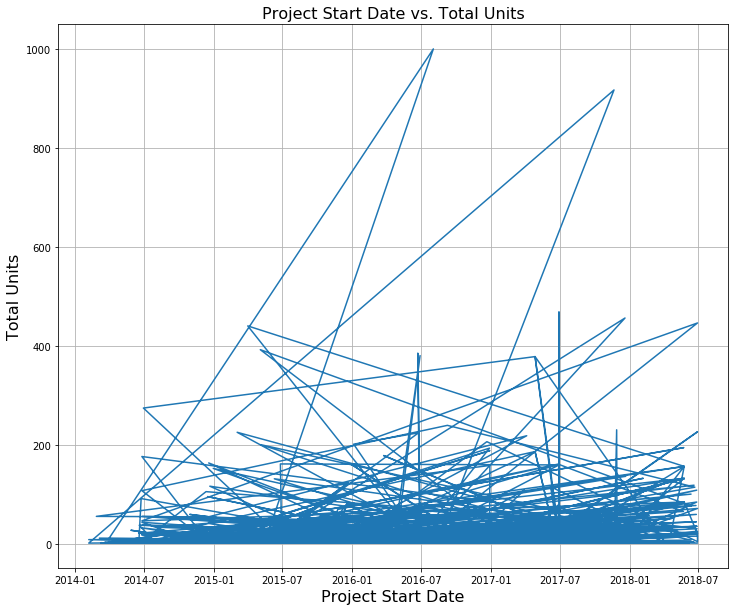

In [89]:
plt.figure(figsize=(12,10))
plt.title('Project Start Date vs. Total Units', fontsize=16)
plt.xlabel('Project Start Date', fontsize=16)
plt.ylabel('Total Units', fontsize=16)
plt.grid(b=True)
plt.plot(df_src['project_start_date'], df_src['total_units'])

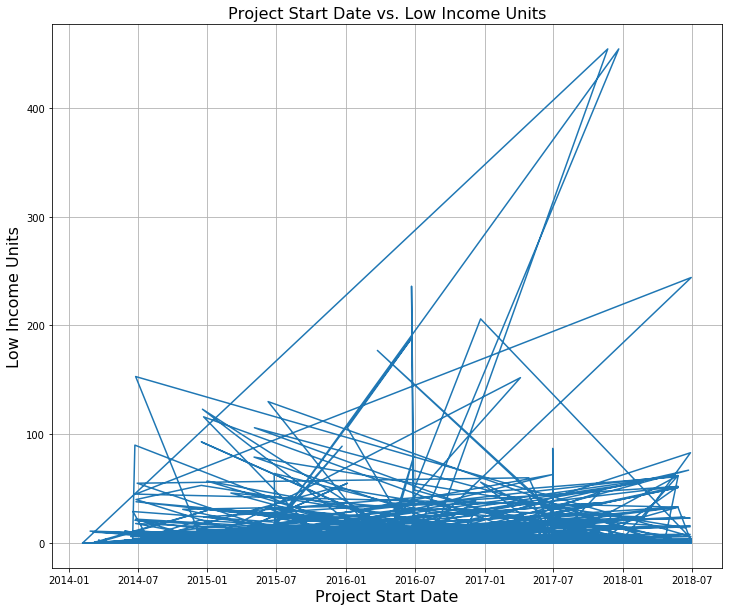

In [90]:
plt.figure(figsize=(12,10))
plt.title('Project Start Date vs. Low Income Units', fontsize=16)
plt.xlabel('Project Start Date', fontsize=16)
plt.ylabel('Low Income Units', fontsize=16)
plt.grid(b=True)
plt.plot(df_src['project_start_date'], df_src['low_income_units'])